## GReaT Example with Iris Dataset

In [1]:
# # Execute only once!
# import os
# import sys
# sys.path.append("..")
# os.chdir("..")

# os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import os
import sys
sys.path.insert(0, "/home/qfyan/FedFetch/be_great")
# sys.path.insert(0, os.path.abspath("~/cs848-group-project/be_great"))
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("~/cs848-group-project/be_great/examples/Example_Iris.ipynb"), '..')))
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("~/cs848-group-project/be_great/examples"))))
os.environ["WANDB_DISABLED"] = "true"
sys.path


['/home/qfyan/FedFetch/be_great',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/qfyan/FedFetch/env/lib/python3.10/site-packages']

In [3]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

In [4]:
from utils import set_logging_level


In [5]:
import matplotlib.pyplot as plt

In [6]:
logger = set_logging_level(logging.INFO)

### Load Data

In [8]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name="adult" , as_frame=True).frame
data.head()

/home/qfyan/FedFetch/env/lib/python3.10/site-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name adult exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=179
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=1590

  warn(warning_msg)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
# print(adult.metadata) 

# variable information 
# print(adult.variables) 

data = adult.data.original
data.head()


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Create GReaT Model

In [ ]:
from be_great.dp.dp import DPLLMTGen


# great = GReaT("distilgpt2",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=1000,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=500,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_iris", # Name of the directory where all intermediate steps are saved
#               batch_size=16,                 # Batch Size
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=5e-5            # Set the inital learning rate
#              )

# great = DPLLMTGen(
#     "gpt2",
#     # epochs=1000,
#     # save_steps=2000,
#     logging_steps=50,
#     experiment_dir="trainer_iris_dpllmtgen_test",
#     batch_size=16,                 # Batch Size
#     # lr_scheduler_type="constant", # Specify the learning rate scheduler 
#     stage1_epochs = 75,
#     stage2_epochs = 600,
#     stage1_lr =1e-4,
#     stage2_lr=1e-5,
#     loss_alpha=0.65,
#     loss_beta=0.1,
#     loss_lmbda=1.0,
#     per_sample_max_grad_norm=3., 
#     target_epsilon=10., 
#     # efficient_finetuning="lora"
# )

great = DPLLMTGen(
    "meta-llama/Llama-2-7b-chat-hf",
    # epochs=1000,
    save_steps=4000,
    logging_steps=200,
    experiment_dir="trainer_adult_dpllmtgen_test",
    batch_size=32,                 # Batch Size
    # lr_scheduler_type="constant", # Specify the learning rate scheduler 
    stage1_epochs = 5,
    stage2_epochs = 2,
    stage1_lr =1e-4,
    stage2_lr=5e-4,
    loss_alpha=0.65,
    loss_beta=0.1,
    loss_lmbda=1.0,
    per_sample_max_grad_norm=1., 
    target_epsilon=10., 
    efficient_finetuning="lora"
)

# from be_great.dp_basic import DPBasic
# great = DPBasic("distilgpt2",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=1,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=100,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_iris_basic_dp_test", # Name of the directory where all intermediate steps are saved
#               batch_size=8,                 # Batch Size
#               per_sample_max_grad_norm=1.0,
#               target_epsilon=3.0,
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=4e-5            # Set the inital learning rate
#               #efficient_finetuning="lora",
#               save_safetensors=False
#              )

/home/qfyan/FedFetch/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-30 22:12:21,457 - INFO - PyTorch version 2.5.1+cu121 available. (config.py:54)
`low_cpu_mem_usage` was None, now default to True since model is quantized.
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]
/home/qfyan/FedFetch/env/lib/python3.10/site-packages/peft/utils/other.py:145: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(


trainable params: 19,988,480 || all params: 6,758,404,096 || trainable%: 0.2957573965106688


### Start Training

In [ ]:
trainer = great.fit(data)

2024-11-30 22:12:24,737 - INFO - Convert data into HuggingFace dataset object... (dp.py:91)
2024-11-30 22:12:24,774 - INFO - Create GReaT Trainer... (dp.py:96)
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


/home/qfyan/FedFetch/be_great/be_great/dp/dp.py:104: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `GReaTTrainer.__init__`. Use `processing_class` instead.
  great_trainer = GReaTTrainer(
2024-11-30 22:12:24,795 - INFO - Start format learning... (dp.py:113)
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/home/qfyan/FedFetch/env/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to

Step,Training Loss


In [11]:
loss_hist = trainer.state.log_history.copy()
loss_hist

[{'loss': 0.4166,
  'grad_norm': 0.3435671329498291,
  'learning_rate': 3.7500000000000003e-05,
  'epoch': 25.0,
  'step': 100},
 {'train_runtime': 185.8845,
  'train_samples_per_second': 32.278,
  'train_steps_per_second': 0.861,
  'total_flos': 0.0,
  'train_loss': 0.4154693841934204,
  'epoch': 40.0,
  'step': 160},
 {'final_epsilon_prv': 7.943186980206636,
  'final_epsilon_rdp': 9.142467810931654,
  'epoch': 40.0,
  'step': 160}]

In [12]:
loss = [x["loss"] for x in loss_hist[:-2]]
epochs = [x["epoch"] for x in loss_hist[:-2]]

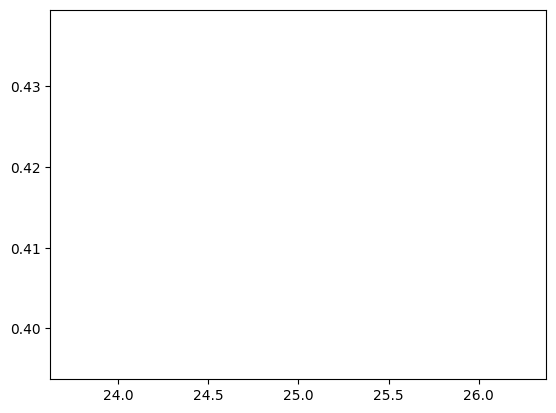

In [13]:
plt.plot(epochs, loss)

### Save Model

In [19]:
great.save("iris_dpllmtgen_llama")

### Load Model

In [ ]:
# great = GReaT.load_from_dir("iris")

### Generate Samples

In [14]:
n_samples = 150

In [15]:
samples = great.sample(n_samples, k=50)

  0%|          | 0/150 [00:00<?, ?it/s]

/home/qfyan/FedFetch/ENV/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/qfyan/FedFetch/ENV/lib/python3.10/site-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/home/qfyan/FedFetch/ENV/lib/python3.10/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
 33%|███▎      | 50/150 [00:46<01:32,  1

In [16]:
samples.head()

,sepal length,sepal width,petal length,petal width,target
0,5.7,2.3,3.5,2.2,1.0
1,6.2,3.9,1.8,2.4,2.0
2,6.8,2.6,4.8,1.5,2.0
3,4.9,2.5,5.6,2.4,1.0
4,5.7,2.4,4.6,0.4,1.0


In [17]:
samples.to_csv("iris_dpllmtgen_test.csv")

We can also influence the distribution of the column on which the generation is conditioned (In the original dataset all three target values (0, 1, 2) have a probability of 33%).

In [ ]:
samples_custom = great.sample(n_samples, k=50, start_col="target",
                              start_col_dist={"0": 0.5, "1": 0.5, "2": 0})

In [ ]:
samples_custom.head()

## Plot Data

Original Data

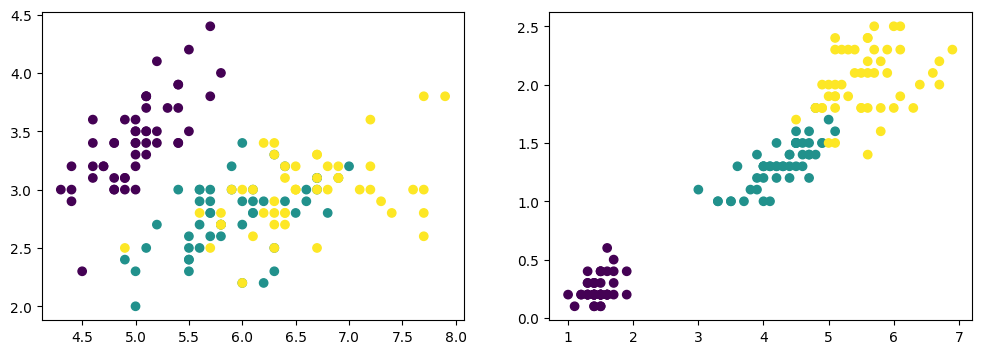

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(data["sepal length"], data["sepal width"], c=data["target"])
ax[1].scatter(data["petal length"], data["petal width"], c=data["target"])

Generated samples

In [18]:
samples = pd.read_csv("iris_dpllmtgen_test.csv")

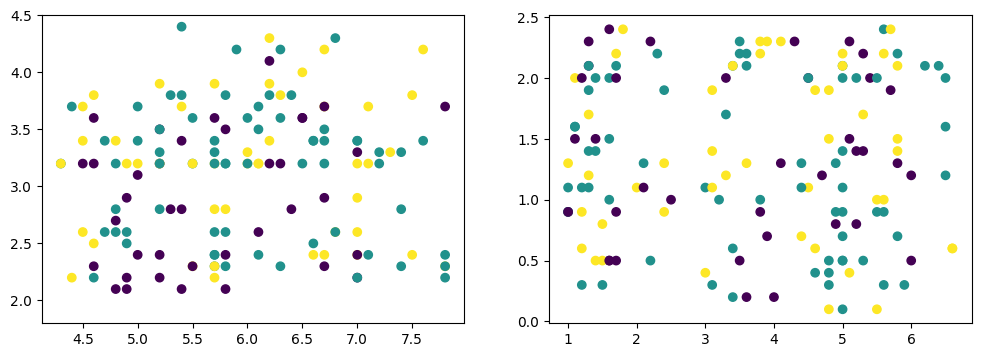

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["sepal length"], samples["sepal width"], c=samples["target"].astype("int"))
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["petal length"], samples["petal width"], c=samples["target"].astype("int"))